# Desafio SONY MUSIC BRASIL
Data Mining, Artificial Intelligence e Machine Learning para explorar dados de audição de música para obter insights e aprender a partir dos dados.
Como prova de conceito serão percorridas (exploradas) as playlists da SONY MUSIC BRASIL no Spotify, serão apresentadas estatísticas e gráficos representativos.
Serão percorridos (explorados) também os artistas brasileiros da gravadora em busca de padrões e será feito ranqueamento seguindo alguns critérios pré estabelecidos.
Serão apresentados indicadores.
Estatísticas como top 10 artistas geral do Spotify e indicadores idênticos aos aplicados acima para fins de referência (comparação).

# Instalação da biblioteca Spotipy para acesso à API SPOTIFY

In [1]:
!pip install spotipy

# Conexão e Autenticação do app MusiKop no Spotify usando a lib Spotipy¶

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

SPOTIPY_CLIENT_ID = 'd0040ac9ab274848b6d44fafaf83c763'
SPOTIPY_SECRET_ID = '0b7ff0706e184c769ef261f8d7d83215'
client_credentials_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_SECRET_ID)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

##  Obtenção das Playlists da SONY MUSIC BRASIL


In [3]:
# Este trabalho aperfeiçoa o trabalho originalmente desenvolvido por Kaio Valente
import pandas as pd
import spotipy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")

playlists = sp.user_playlists('sonymusicbr')
sp.trace=False 
print (playlists)

{'href': 'https://api.spotify.com/v1/users/sonymusicbr/playlists?offset=0&limit=50', 'items': [{'collaborative': False, 'description': '', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/5Xfs28wOdb4hQcnAWOq4ap'}, 'href': 'https://api.spotify.com/v1/playlists/5Xfs28wOdb4hQcnAWOq4ap', 'id': '5Xfs28wOdb4hQcnAWOq4ap', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b27393c460db5a900c2163c15630', 'width': 640}], 'name': 'Kemilly Santos: Maravilhosa Graça', 'owner': {'display_name': 'Sony Music Brasil', 'external_urls': {'spotify': 'https://open.spotify.com/user/sonymusicbr'}, 'href': 'https://api.spotify.com/v1/users/sonymusicbr', 'id': 'sonymusicbr', 'type': 'user', 'uri': 'spotify:user:sonymusicbr'}, 'primary_color': None, 'public': True, 'snapshot_id': 'MixhYWYzMzI5NjkxZDJhYjNlMTdlOGVjNTU4NmZmNTkzODkxZWZmMzQ2', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/5Xfs28wOdb4hQcnAWOq4ap/tracks', 'total': 1}, 'type': 'playlist', 'uri': 'spotify:pl

In [4]:
#playlists = sp.user_playlists('spotify')
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None

   1 spotify:playlist:5Xfs28wOdb4hQcnAWOq4ap Kemilly Santos: Maravilhosa Graça
   2 spotify:playlist:04eGSIcdZmSQHoxYvecogu Lançamentos Sony Music 2020
   3 spotify:playlist:5G31KpDp4qi6RutKxSBhN9 Pop Rock Nacional | Sony Music
   4 spotify:playlist:3fx9K98Mf0wqJUNFHwsaKJ Eletrônicas 2020 | Sony Music
   5 spotify:playlist:4m2FZxH8hRhfiFE8Za97e3 Rap 2020 | Sony Music
   6 spotify:playlist:39XXEziwgNqkOipAyVdgj7 Pagodes 2020 | Sony Music
   7 spotify:playlist:5gZbRJA1DaGziGyNOY0R4i Melhores Sertanejos 2020 🔝
   8 spotify:playlist:44SceqGtU8MeTaBL9yuWiw Lançamentos Nacionais Sony Music
   9 spotify:playlist:1xiAzXK6qxHLXVVtAXgIZp Lançamentos Internacionais 2020 | Sony Music
  10 spotify:playlist:4Pn4Bu1rXYKhnZv5qX9l0C Apostas 2020 | Sony Music
  11 spotify:playlist:3s6pzAP2AsaWIHcpSatR3c Barões da Pisadinha - As Melhores - Recairei
  12 spotify:playlist:2Y4TqcPgkPL8NybAFguvfG Bruno e Marrone - As Melhores - Boate Azul
  13 spotify:playlist:1eXQvTnIwQhiNiNATJg0Py Chico Buarque - As Melhor

## Explorando playlist com lista de lançamentos nacionais da SONY MUSIC BRASIL



In [5]:
playlist = sp.user_playlist_tracks('sonymusicbr', '44SceqGtU8MeTaBL9yuWiw', offset=0) 
songs = playlist['items']

In [6]:
print (playlist)
print(songs)

{'href': 'https://api.spotify.com/v1/playlists/44SceqGtU8MeTaBL9yuWiw/tracks?offset=0&limit=100&additional_types=track', 'items': [{'added_at': '2020-03-20T13:51:13Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/sonymusicbr'}, 'href': 'https://api.spotify.com/v1/users/sonymusicbr', 'id': 'sonymusicbr', 'type': 'user', 'uri': 'spotify:user:sonymusicbr'}, 'is_local': False, 'primary_color': None, 'track': {'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6tzRZ39aZlNqlUzQlkuhDV'}, 'href': 'https://api.spotify.com/v1/artists/6tzRZ39aZlNqlUzQlkuhDV', 'id': '6tzRZ39aZlNqlUzQlkuhDV', 'name': 'Pabllo Vittar', 'type': 'artist', 'uri': 'spotify:artist:6tzRZ39aZlNqlUzQlkuhDV'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/23wEWD21D4TPYiJugoXmYb'}, 'href': 'https://api.spotify.com/v1/artists/23wEWD21D4TPYiJugoXmYb', 'id': '23wEWD21D4TPYiJugoXmYb', 'name': 'Thalía', 'type': 'artist', 'uri': 's

In [7]:
df = pd.DataFrame(songs)
print(songs)
df.head()

[{'added_at': '2020-03-20T13:51:13Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/sonymusicbr'}, 'href': 'https://api.spotify.com/v1/users/sonymusicbr', 'id': 'sonymusicbr', 'type': 'user', 'uri': 'spotify:user:sonymusicbr'}, 'is_local': False, 'primary_color': None, 'track': {'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6tzRZ39aZlNqlUzQlkuhDV'}, 'href': 'https://api.spotify.com/v1/artists/6tzRZ39aZlNqlUzQlkuhDV', 'id': '6tzRZ39aZlNqlUzQlkuhDV', 'name': 'Pabllo Vittar', 'type': 'artist', 'uri': 'spotify:artist:6tzRZ39aZlNqlUzQlkuhDV'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/23wEWD21D4TPYiJugoXmYb'}, 'href': 'https://api.spotify.com/v1/artists/23wEWD21D4TPYiJugoXmYb', 'id': '23wEWD21D4TPYiJugoXmYb', 'name': 'Thalía', 'type': 'artist', 'uri': 'spotify:artist:23wEWD21D4TPYiJugoXmYb'}], 'available_markets': ['AD', 'AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE', 'BG', 'BH', 'BO', '

,added_at,added_by,is_local,primary_color,track,video_thumbnail
0,2020-03-20T13:51:13Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'single', 'artists': ...",{'url': None}
1,2020-03-20T13:51:13Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'single', 'artists': ...",{'url': None}
2,2020-03-20T13:51:13Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'single', 'artists': ...",{'url': None}
3,2020-03-20T13:51:13Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'single', 'artists': ...",{'url': None}
4,2020-03-20T13:51:13Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'single', 'artists': ...",{'url': None}


## Obtendo dados de artistas SONY MUSIC BRASIL, álbums e músicas da API do Spotify

Dois Dataframes Panda foram montados: um contendo infomações sobre a música e seu respectivo artista e álbum.

Outro com informações específicas do artista, incluindo os gêneros músicais e a popularidade no Spotify.

Escolhemos a playlist de Lançamentos Nacionais da SONY MUSIC BRASIL como POC (Proof of Concept) para obter um MVP (Minimum Viable Product)

In [8]:
musics_info = []
artists = []
for i, item in enumerate(songs):
    track = item['track']
    added_at = item['added_at']
    try:
      artist = sp.artist(track['artists'][0]['id'])
    except AttributeError:
       print('Error getting artists data')
    musics_info.append((track['artists'][0]['name'], track['name'], track['album']['name'], added_at, track['id']))
    artists.append((track['artists'][0]['name'], track['artists'][0]['id'], artist['genres'], artist['popularity'] ))

#print(artists)

pd.set_option('display.max_rows', 50)
musics = pd.DataFrame(musics_info, columns=('Artists', 'Name', 'Album', 'Added_At', 'Id'))
musics


,Artists,Name,Album,Added_At,Id
0,Pabllo Vittar,Tímida,Tímida,2020-03-20T13:51:13Z,4UMnUuQ9cYTSdv9FNy9uWb
1,Lagum,Hoje Eu Quero Me Perder,Hoje Eu Quero Me Perder,2020-03-20T13:51:13Z,6ZUArSVO6hPj6e27tD3OyT
2,Dilsinho,Deixa pra Amanhã - Ao Vivo,Deixa pra Amanhã (Ao Vivo),2020-03-20T13:51:13Z,6hqJJY6rwAUS2zl9FsCQQH
3,Turma do Pagode,O Brasil Tem Que Te Ver (feat. MC KEVINHO),O Brasil Tem Que Te Ver (feat. MC KEVINHO),2020-03-20T13:51:13Z,3SVRfC0uq01bI5jGCLkQjC
4,WC no Beat,BALANÇA (feat. Pedro Sampaio),BALANÇA (feat. Pedro Sampaio),2020-03-20T13:51:13Z,4p8pEdPYOQLzJUKYrLOacy
...,...,...,...,...,...
71,Rashid,Bilhete 2.0 (feat. Luccas Carlos),Crise,2020-03-20T13:51:13Z,23DMhYv6WjRmIRck1Uwjev
72,Sorriso Maroto,O Impossível,O Impossível,2020-03-20T13:51:13Z,3RVylAtukXgF7xSXFn2OwA
73,Alok,Favela,Favela,2020-03-20T13:51:13Z,2JVbZEpewmqNlSzmXJTx2E
74,Gusttavo Lima,Quem Traiu Levou - Ao Vivo,Quem Traiu Levou (Ao Vivo),2020-03-20T13:51:13Z,1owErGXMkNVCgCmCjI1vRL


In [9]:
df_artists = pd.DataFrame(artists, columns=('Name', 'Id', 'Genres', 'Popularity'))
df_artists

,Name,Id,Genres,Popularity
0,Pabllo Vittar,6tzRZ39aZlNqlUzQlkuhDV,"[dance pop, funk carioca, funk pop, pop, pop l...",71
1,Lagum,5D56dZmhE9DgT01XixdHiD,"[belo horizonte indie, brazilian edm, funk car...",72
2,Dilsinho,4NUePmzDvCYqilXBFa91Hg,"[pagode, pagode novo]",81
3,Turma do Pagode,5JG9GISYjRLQUJMH2C6iJ5,"[funk carioca, pagode, pagode novo, sertanejo ...",74
4,WC no Beat,2QjS2N6sORI7H4qbf6xitS,"[brazilian edm, brazilian hip hop, funk carioc...",70
...,...,...,...,...
71,Rashid,5WgRuO0mhM36NFoapzpWBH,"[brazilian hip hop, pop rap brasileiro, r&b br...",68
72,Sorriso Maroto,1fUSLFr4WUBx7joEcGwpvG,"[pagode, sertanejo universitario]",73
73,Alok,0NGAZxHanS9e0iNHpR8f2W,"[electro house, pop nacional]",84
74,Gusttavo Lima,7MiDcPa6UiV3In7lIM71IN,[sertanejo universitario],85


In [10]:
len(df_artists['Name'].unique().tolist())

36

Montando Dataframe de gêneros musicais dentre os artistas da playlist de lançamentos nacionais


In [11]:
genres = []
for index, row in df_artists.iterrows():
    for i, item in enumerate(row['Genres']):
      genres.append(item)

genres_df = pd.DataFrame(genres, columns =['Count'])
genres_df

,Count
0,dance pop
1,funk carioca
2,funk pop
3,pop
4,pop lgbtq+ brasileira
...,...
205,electro house
206,pop nacional
207,sertanejo universitario
208,pagode


In [12]:
genres_df['Count'].value_counts()

sertanejo universitario     31
sertanejo pop               25
funk carioca                22
sertanejo                   17
pagode                      15
brazilian edm               12
pagode novo                 10
brazilian hip hop            9
funk das antigas             6
forro                        6
pop nacional                 5
r&b brasileiro               4
belo horizonte indie         4
nova mpb                     4
pop rap brasileiro           4
piseiro                      3
funk pop                     3
pop lgbtq+ brasileira        3
brazilian rock               2
dance pop                    2
manguebeat                   2
trap brasileiro              2
pop                          2
brazilian reggae             2
funk ostentacao              2
trap funk                    1
hip hop tuga                 1
latin alternative            1
samba moderno                1
rock nacional brasileiro     1
pop rock brasileiro          1
rap cearense                 1
funk 150

In [13]:
musics['Artists'].value_counts().head(20)

Dennis DJ                 5
Lagum                     4
Turma do Pagode           4
Sorriso Maroto            4
Dilsinho                  4
Diego & Victor Hugo       3
Fernando & Sorocaba       3
Os Barões Da Pisadinha    3
Gusttavo Lima             3
Rashid                    3
Henrique & Diego          3
Avine Vinny               3
Diego & Arnaldo           3
Yasmin Santos             3
Pabllo Vittar             2
Marcos & Belutti          2
Oriente                   2
Lucas Lucco               2
Rael                      2
Guilherme & Benuto        2
Name: Artists, dtype: int64

In [14]:
musics['Album'].value_counts().head(20)

Terra do Nunca (Ao Vivo)                                 2
O Embaixador in Cariri - Vol. 1 (Ao Vivo)                2
BALANÇA (feat. Pedro Sampaio)                            1
Yasmin Santos Ao Vivo em São Paulo - EP 1                1
Capim-Cidreira                                           1
Pesquisa no Google (feat. Henrique & Diego) [Ao Vivo]    1
Apimentadíssima                                          1
Hoje Eu Quero Me Perder                                  1
Deixa (feat. Ana Gabriela)                               1
O Brasil Tem Que Te Ver (feat. MC KEVINHO)               1
Feliz ou Infelizmente (Ao Vivo)                          1
Coisas da Geração                                        1
Medley da Gaiola (Dennis DJ Remix)                       1
Você Não Me Deu Moral                                    1
Crise                                                    1
Deixa pra Amanhã (Ao Vivo)                               1
Detesto Despedidas                                      

## 20 Artistas mais presentes na playlist de lançamentos nacionais

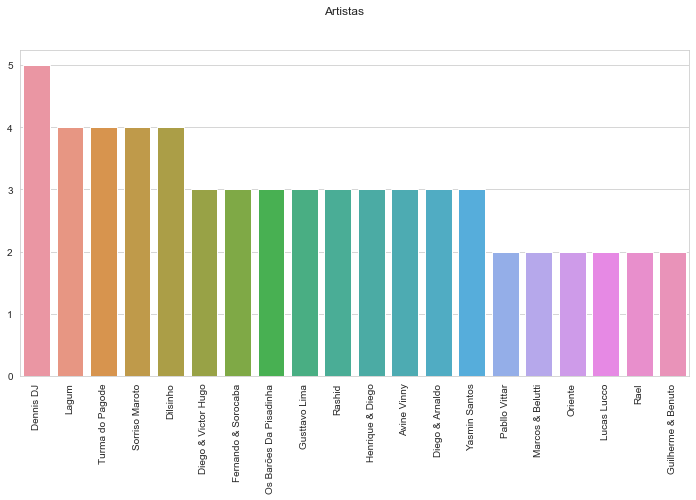

In [15]:
names = list(musics['Artists'].value_counts().keys())[:20]
values = list(musics['Artists'].value_counts())[:20]

fig, ax = plt.subplots(figsize=(12,6))
ax=sns.barplot(x=names, y=values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xticks(rotation=90);
fig.suptitle('Artistas');

## 20 Álbuns mais presentes na playlist de lançamentos nacionais

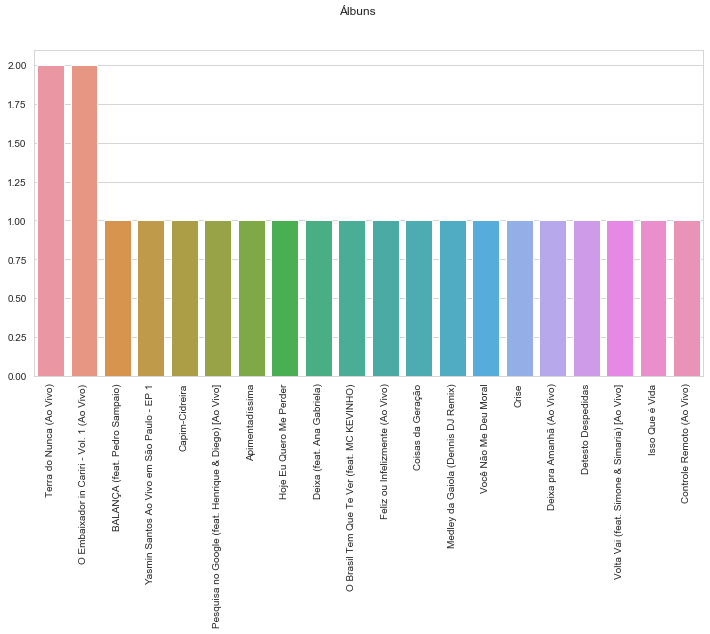

In [16]:
names = list(musics['Album'].value_counts().head(20).keys())
values = list(musics['Album'].value_counts().head(20))

fig, ax = plt.subplots(figsize=(12,6))
ax=sns.barplot(x=names, y=values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xticks(rotation=90);
fig.suptitle('Álbuns');

##  20 Estilos mais presentes na playlist de lançamentos nacionais

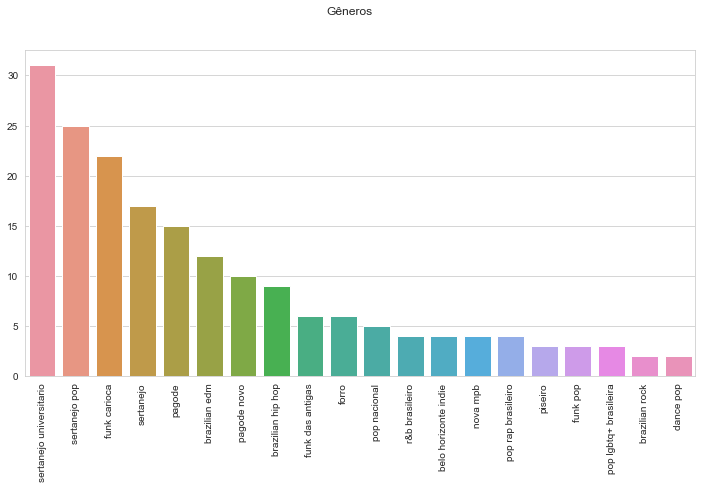

In [17]:
names = list(genres_df['Count'].value_counts().keys())[:20]
values = list(genres_df['Count'].value_counts())[:20]

fig, ax = plt.subplots(figsize=(12,6))
ax=sns.barplot(x=names, y=values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig.suptitle('Gêneros');

## Artistas mais populares na playlist de lançamentos nacionais SONY MUSIC BRASIL

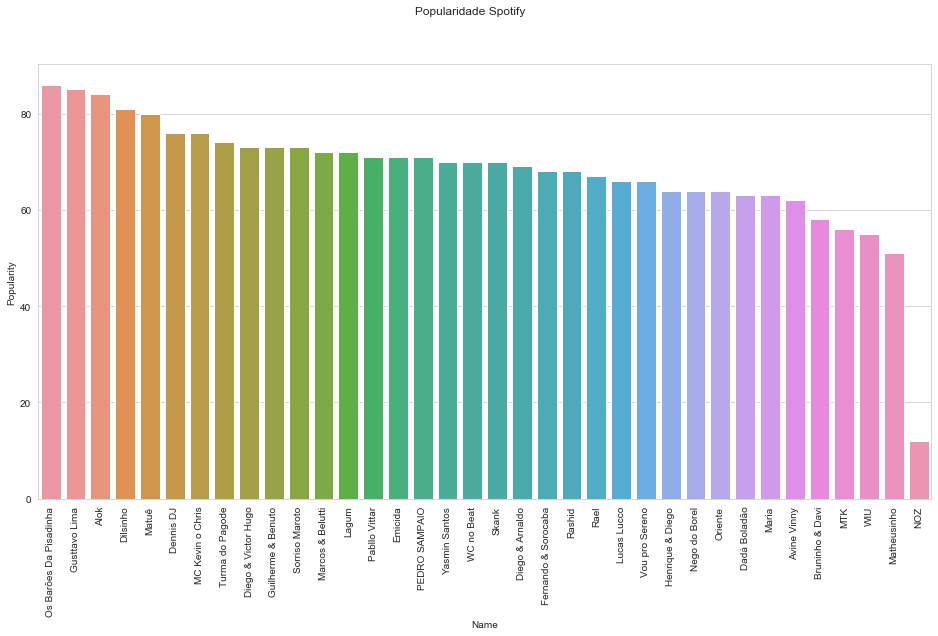

In [18]:
df_artists = df_artists.sort_values(by=['Popularity'], ascending=False)

names = df_artists['Name'].head(100)
values =  df_artists['Popularity'].head(100)

fig, ax = plt.subplots(figsize=(16,8))
ax=sns.barplot(x=names, y=values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig.suptitle('Popularidade Spotify');

## Wordcloud montada com os artistas mais presentes na playlist selecionada

In [19]:
all_summary = " ".join(s for s in musics['Artists'])

print("Number of words: {}".format(len(all_summary)))

Number of words: 967


# Instalação da biblioteca Wordcloud

In [20]:
!pip install wordcloud

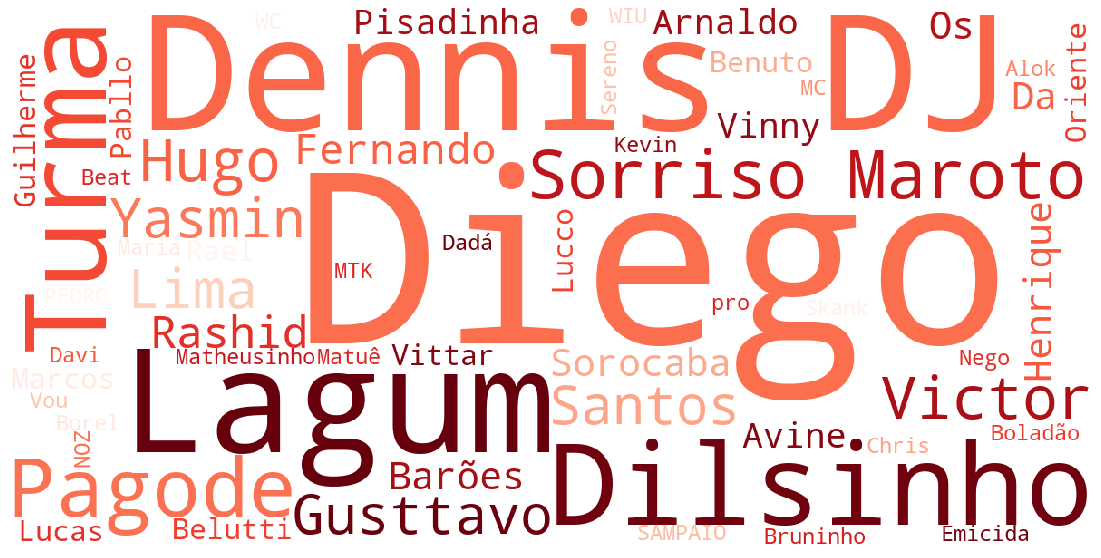

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# gerar uma wordcloud
wordcloud = WordCloud(background_color="white",
                      width=1200, height=600, colormap="Reds").generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("artistas_spotify_sonymusicbr.png");

In [ ]:
def musics_playlists(songs):
    musics_info = []
    artists = []
    for i, item in enumerate(songs):
        track = item['track']
        added_at = item['added_at']
        try:
          artist = sp.artist(track['artists'][0]['id'])
        except AttributeError:
           print('Error getting artists data')
        musics_info.append((track['artists'][0]['name'], track['name'], track['album']['name'], added_at, track['id']))
        artists.append((track['artists'][0]['name'], track['artists'][0]['id'], artist['genres'], artist['popularity'] ))

#print(artists)

    pd.set_option('display.max_rows', 50)
    musics = pd.DataFrame(musics_info, columns=('Artists', 'Name', 'Album', 'Added_At', 'Id'))
    return musics
#    musics

In [ ]:
def summary (musics):
    all_summary = " ".join(s for s in musics['Artists'])
    print("Number of words: {}".format(len(all_summary)))
    return all_summary

In [ ]:
import unicodedata
def tira_acento(text):
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    return str(text)

In [ ]:
def chr_remove(old, to_remove):
    new_string = old
    for x in to_remove:
        new_string = new_string.replace(x, '')
    return new_string

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def gerarWordCloud (summary, name): # gerar uma wordcloud
    wordcloud = WordCloud(background_color="white",
                      width=1200, height=600, colormap="Reds").generate(summary)

    # mostrar a imagem final
    fig, ax = plt.subplots(figsize=(20,10))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()

    plt.imshow(wordcloud)
    file_name=""
    name=tira_acento(chr_remove(name, "$(#:|)"))
    file_name=name+".png"
    wordcloud.to_file(file_name)

In [ ]:
def geraArquivoWordCloud(playlist,name):
    musics=musics_playlists(playlist)
    all_summary = summary(musics)
    gerarWordCloud (all_summary, name)

## Processa todas as playlists da SONY MUSIC BRASIL e gera a imagem da nuvem de palavras
Note-se que podem ser extraídos insights dos arquivos gerados e salvos com a imagem das playlists:
1) A maioria  das playlists começadas por "This is ..." apresentam os artistas cantando junto com outros artistas;
2) Se compararmos, por exemplo as playlists da Pabllo Vittar "This is.." ou da Adriana Calcanhoto, esse padrão fica evidente;
3) A imagem da nuvem de palavras traduz bem a essência da playlist, mostrando os artistas mais frequentes, ou seja, uma imagem mostra o "comportamento" da playlist em uma visão rápida.

Obs. Devem ser rodadas todas as defs anteriores. O ideal é rodar todas as células de código sequencialmente de cima para baixo

In [ ]:
playlists = sp.user_playlists('sonymusicbr')
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
        name = playlist['name']
        playlist = sp.user_playlist_tracks('sonymusicbr', playlist['id'], offset=0) 
        songs = playlist['items']
        geraArquivoWordCloud(songs,name)
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None